In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Social_Network_Ads.csv', usecols=['Age', 'EstimatedSalary', 'Purchased'])
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Social_Network_Ads.csv'

In [435]:
df.shape

(400, 3)

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [437]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [438]:
y = df.Purchased     # target variable
X = df.iloc[:, 0:2]  # features variable

In [439]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [441]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [442]:
scaler = StandardScaler()
scaler.fit(X_train)       # fits the X_train and finds the mean and standard deviation

StandardScaler()

In [443]:
X_train.describe()

,Age,EstimatedSalary
count,320.00000,320.000000
mean,38.21875,69928.125000
std,10.30304,34570.057299
min,18.00000,15000.000000
25%,30.00000,43000.000000
50%,38.00000,69500.000000
75%,46.00000,88000.000000
max,60.00000,150000.000000


In [444]:
# transforms the X_train and X_test by computing the (X - mean)/std 
scaled_X_train = scaler.transform(X_train)  
scaled_X_test = scaler.transform(X_test)

In [445]:
scaled_X_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

since scaling returns a pd series, we convert it to dataFrame for easy visualizations

In [447]:
# scaled_X_train = pd.DataFrame(scaled_X_train)
# scaled_X_test = pd.DataFrame(scaled_X_test)

In [448]:
scaled_X_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

There's still a problem, instead of displaying the column names, it is giving us a index-based labeling

In [450]:
scaled_X_train = pd.DataFrame(scaled_X_train, columns = X_train.columns)
scaled_X_test = pd.DataFrame(scaled_X_test, columns = X_test.columns)

In [451]:
scaled_X_train

,Age,EstimatedSalary
0,1.922950,2.146016
1,2.020161,0.378719
2,-1.382215,-0.432499
3,-1.187794,-1.011940
4,1.922950,-0.925024
...,...,...
315,0.950843,-1.156800
316,-0.896162,-0.780164
317,-0.215686,-0.519415
318,-1.090583,-0.461471


In [452]:
# finding the mean and std of the transformed/ Standardized columns
np.round(scaled_X_train.describe())

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,1.0
max,2.0,2.0


#### Now, the above codes are repetitve and can be written in shorter form.

In [454]:
# scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
# scaled_X_test - pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Effect of scaling

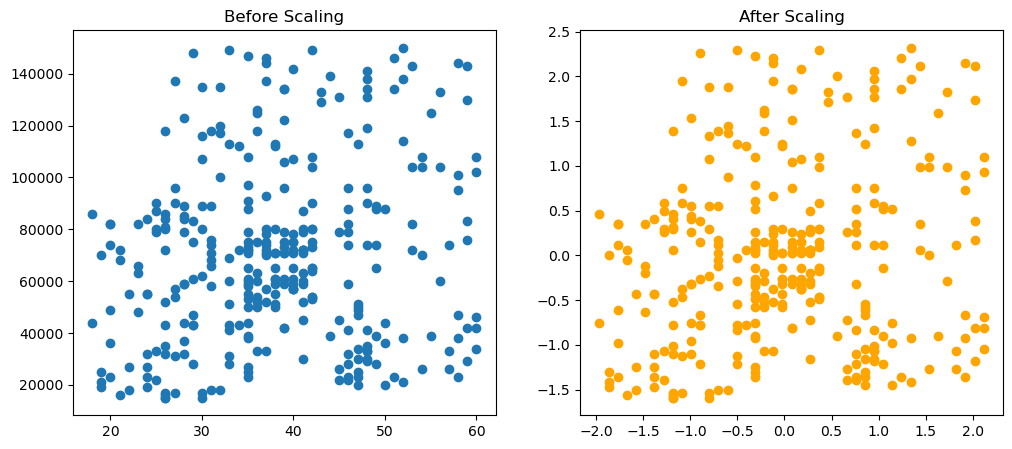

In [456]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before Scaling
ax1.scatter(x=X_train.Age, y=X_train.EstimatedSalary)
ax1.set_title("Before Scaling")

# After Scaling
ax2.scatter(x=scaled_X_train.Age, y=scaled_X_train.EstimatedSalary, color='orange')
ax2.set_title("After Scaling")
plt.show()

From the above graph, we can see that the scatters are exactly the same but their scaling on the X-axis and the y-axis has changed. 
For more intuition, we can plot a kde plot.

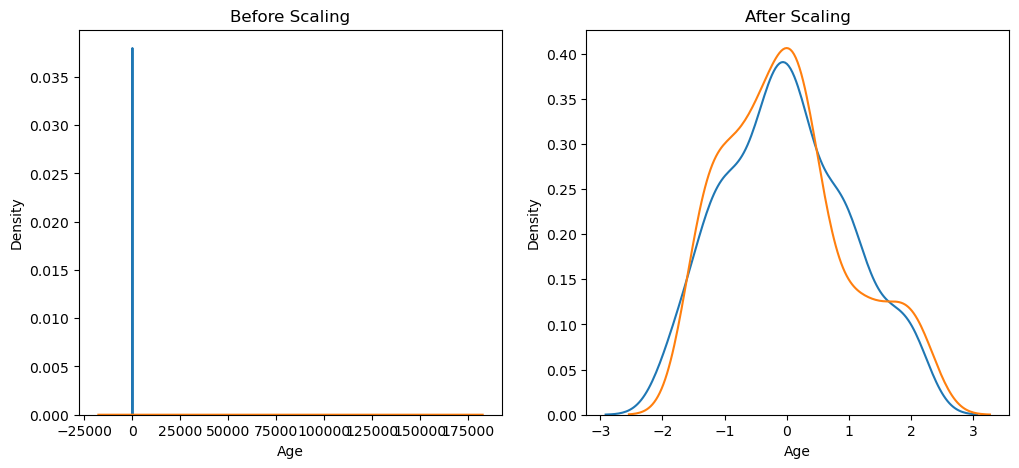

In [458]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before Scaling
sns.kdeplot(X_train.Age, ax=ax1)
sns.kdeplot(X_train.EstimatedSalary, ax=ax1)
ax1.set_title("Before Scaling")

sns.kdeplot(scaled_X_train.Age, ax=ax2)
sns.kdeplot(scaled_X_train.EstimatedSalary, ax=ax2)
ax2.set_title("After Scaling")
plt.show()

As we can see from the above graph, since the age columns are in 10's and salary's columns are in 1000's, there is no comparison to two columns. However, after scaling both these columns are now in the form of 1's and are comparable. We can easily draw our insight by looking at second graph. 

Now, let's see if standardization helped us improve our model's performance

In [461]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [462]:
linear_model = LogisticRegression()
tree_model = DecisionTreeClassifier()

In [496]:
def get_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    score = accuracy_score(y_test, preds)
    return score

In [498]:
lm_before_standardization = get_model(linear_model, X_train, X_test, y_train, y_test)
lm_after_standardization = get_model(linear_model, scaled_X_train, scaled_X_test, y_train, y_test)
tm_before_standardization = get_model(tree_model, X_train, X_test, y_train, y_test)
tm_after_standardization = get_model(tree_model, scaled_X_train, scaled_X_test, y_train, y_test)

In [500]:
print("Accuracy score of Logistic Regression before Standardization: ", lm_before_standardization)
print("Accuracy score of Logistic Regression after Standardization: ", lm_after_standardization)
print("Accuracy score of Decision Tree Classification before Standardization: ", tm_before_standardization)
print("Accuracy score of Decision Tree Classification after Standardization: ", tm_after_standardization)

Accuracy score of Logistic Regression before Standardization:  0.9125
Accuracy score of Logistic Regression after Standardization:  0.925
Accuracy score of Decision Tree Regressor before Standardization:  0.9125
Accuracy score of Decision Tree Regressor after Standardization:  0.9


As we can see, there is a slight improvement in the Regression Model accuracy and slight decrement in the model's perfom